<a href="https://colab.research.google.com/github/msatyajit7045/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [104]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [105]:
#Reading the csv file
df = pd.read_csv('/content/SeoulBikeData.csv',encoding = 'unicode_escape')

## **Details of DataFrame**


In [106]:
# lets see some top rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [107]:
# let see some bottom rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [108]:
# print technical information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [109]:
# shape of tha dataframe
df.shape


(8760, 14)

In [110]:
# use describe for the statistical pertaining to the dataframe of columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [111]:
# check for Null values in our data frame.
df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **Data Cleaning**

In [112]:
# rename the columns name for easy to analysis
df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [113]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [114]:
# Changing The datatype of Date columns to extract 'Month' ,'Day', "year".
df['Date']=df['Date'].astype('datetime64[ns]')

In [115]:
# Creating new columns 'Month', 'Year' ,'Day.
df['Month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day_name()

In [116]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [117]:
# Now We can Drop Day and Date columns.

df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [118]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


## **EDA**

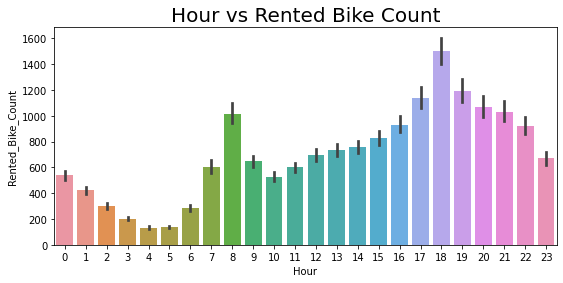

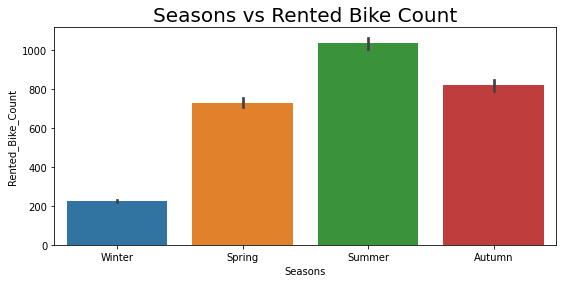

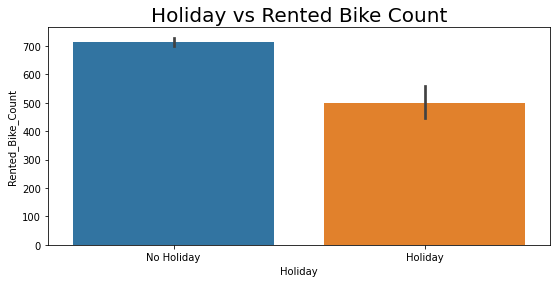

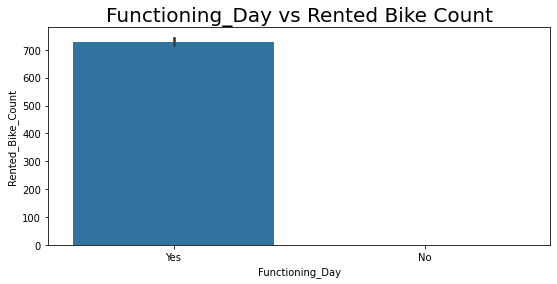

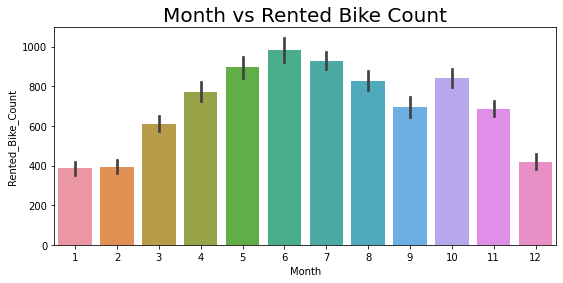

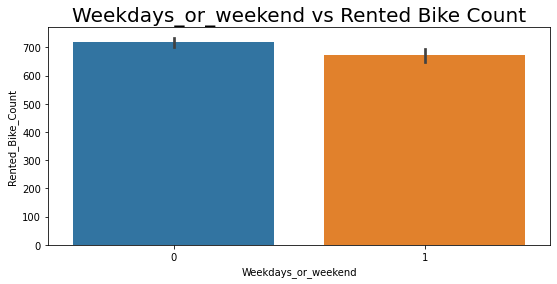

In [120]:
categorical_columns = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekdays_or_weekend']

for col in categorical_columns:
    fig = plt.figure(figsize=(9, 4))
    ax = fig.gca()
    sns.barplot(x=df[col],y=df['Rented_Bike_Count'])
    plt.title(col+' vs '+ 'Rented Bike Count', fontsize=20)


#**Observations From Above Barcharts:**

###***1) Generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***
###***2) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.***
###***3) High number of bikes were rented on No Holidays.***
###***4) On no functioning day no bikes were rented.***
### ***5) From March Bike Rent Count started increasing and it was highest in June.*** 

### ***6) Most of the bikes were rented on Weekdays compared to weekends.***




### **Now we will check Bike Rent Count trend with respect  to Hour on Functioning days,weekends or weekdays,seasons,Holidays columns.**

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

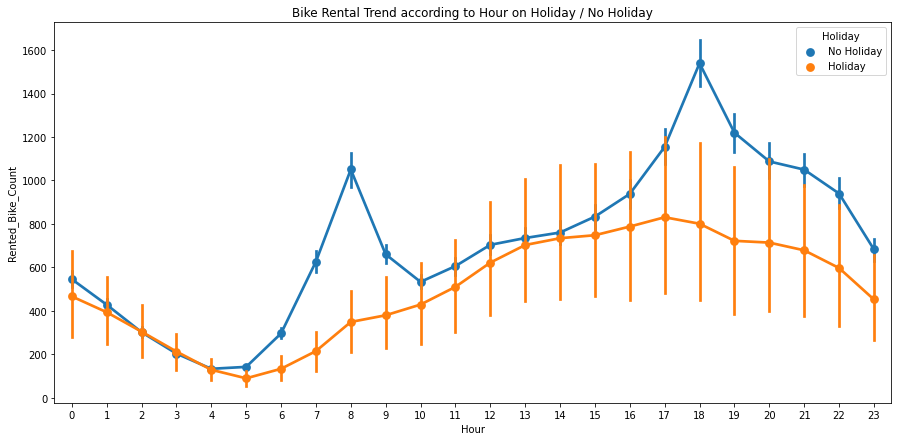

In [122]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(15,7))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

## ***Observation***
 #### ***1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different  less bike rentals happend.***
 #### ***2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people(NO Holiday).*** 


Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

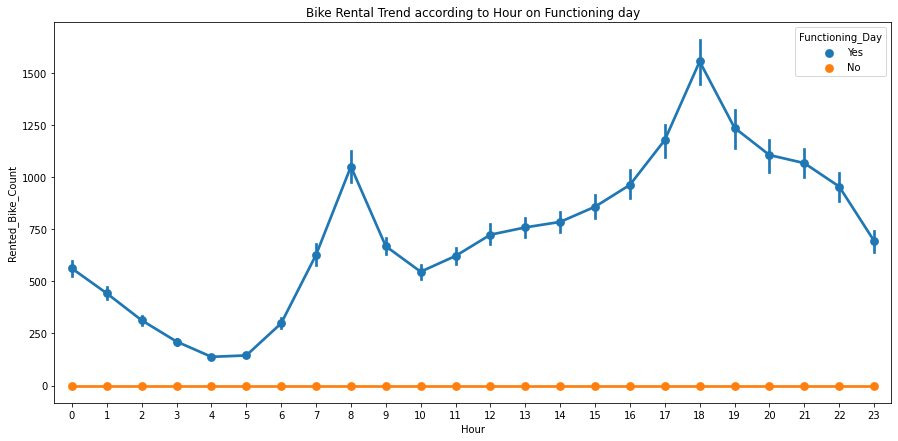

In [124]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(15,7))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

## ***Observation***
###     ***Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.***

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

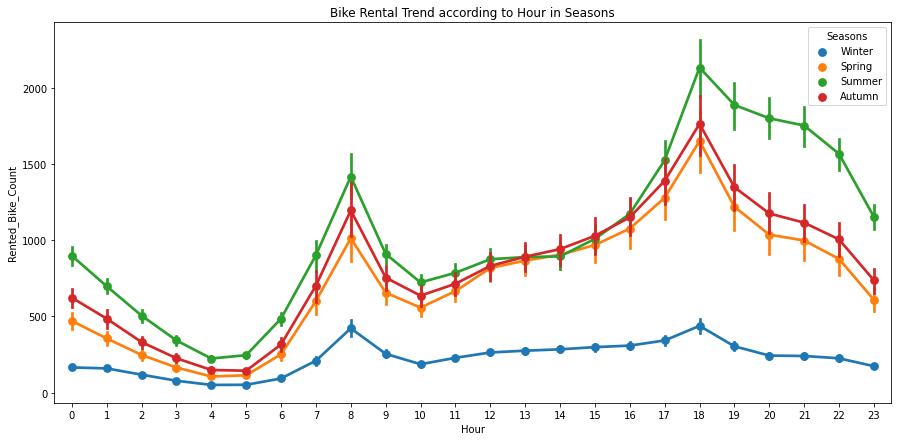

In [125]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(15,7))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

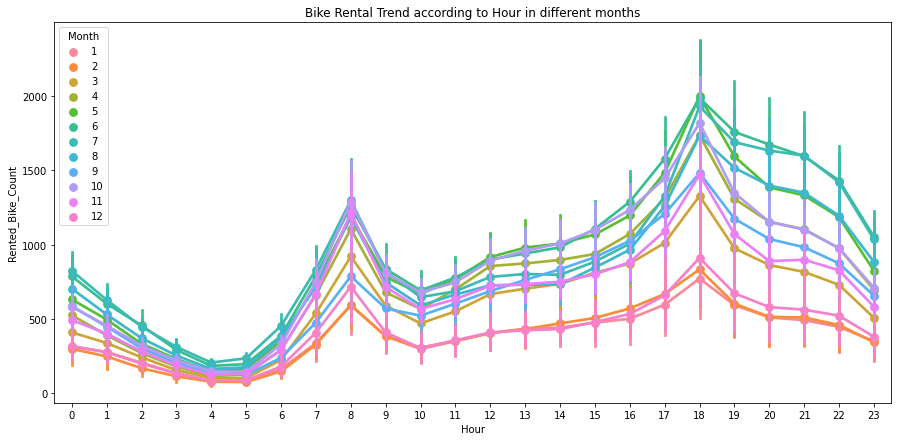

In [126]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(15,7))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Month'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

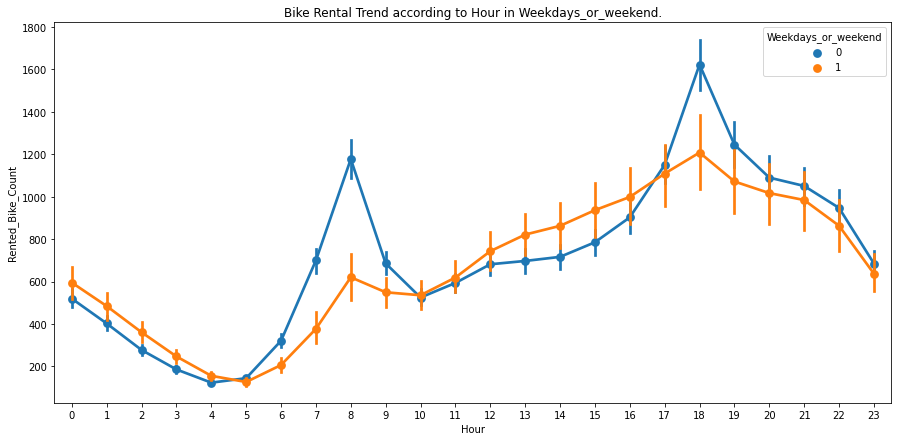

In [127]:

## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(15,7))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend


##**Let's check distribution of depended variable:- "Bike Rented Count"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


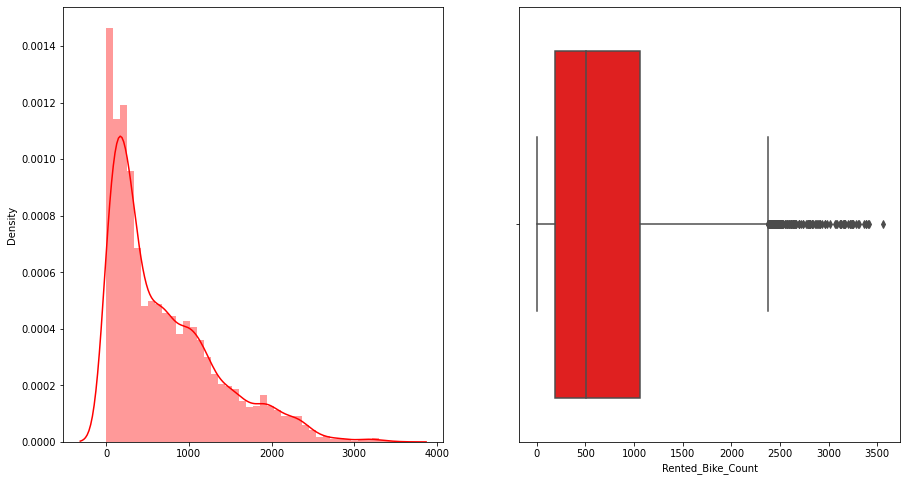

In [128]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=df['Rented_Bike_Count'],color='red',ax=axes[1])

###  Our target varibale's distribution is slightly right skewed.So we have to normalizing  our target variable by squre root method

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


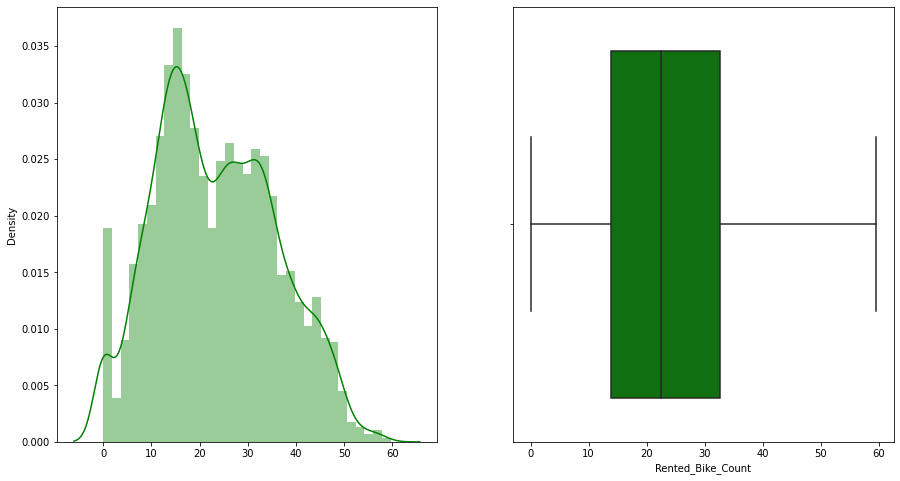

In [129]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[1])

In [25]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


##**Let's check distribution of independed variable**


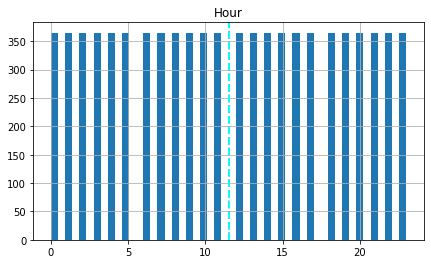

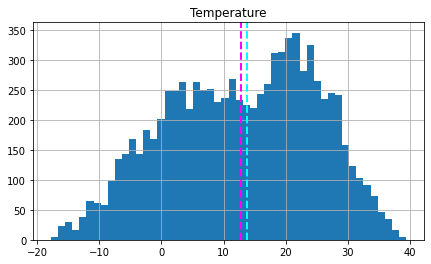

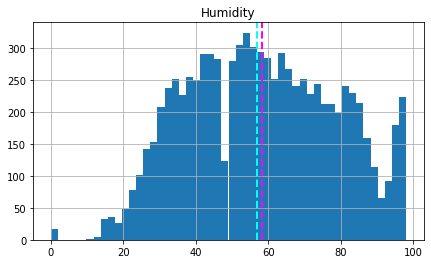

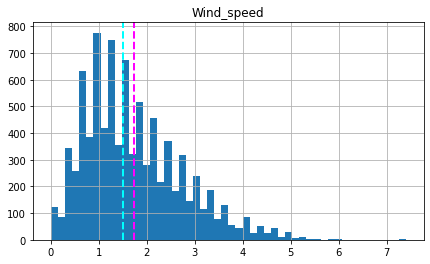

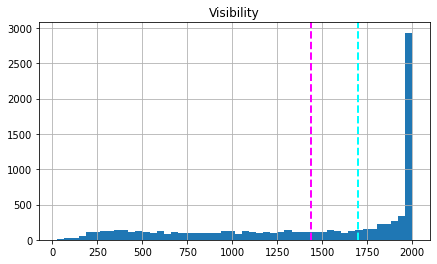

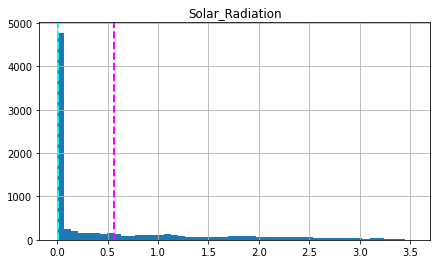

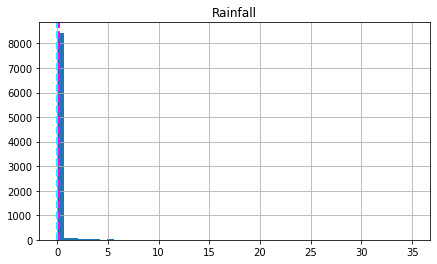

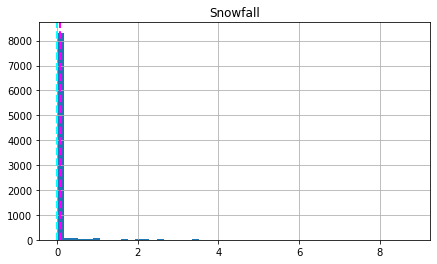

In [130]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.
numeric_col = ['Hour','Temperature','Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']

for col in numeric_col:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


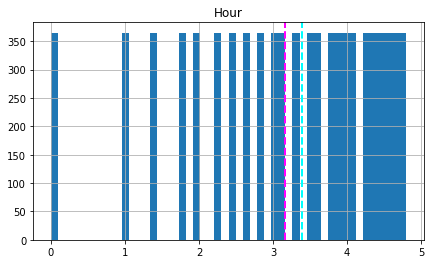

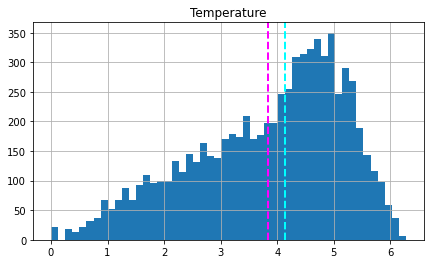

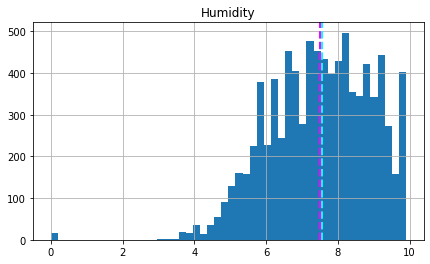

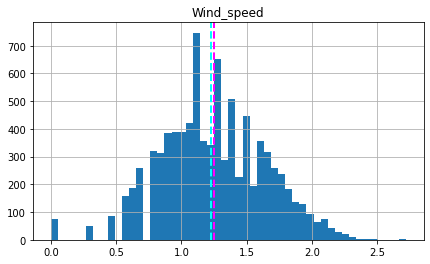

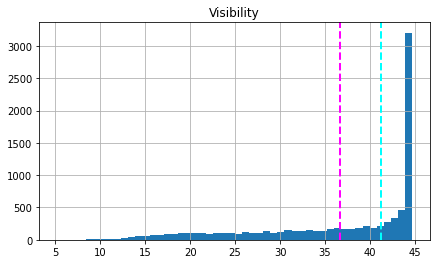

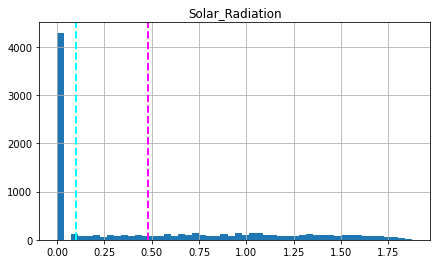

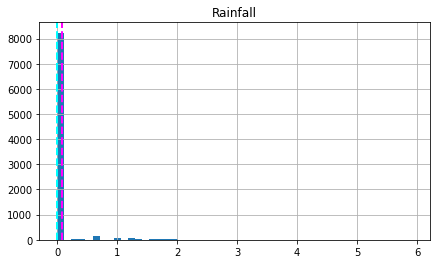

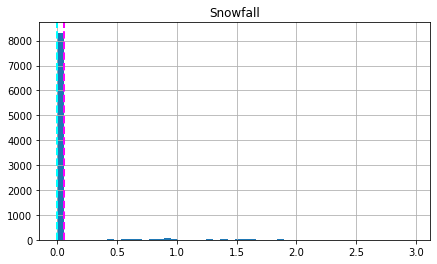

In [75]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## **Lets check the relationship between the dependent variable-"Rented Bike Count' and 'independent variable'.**

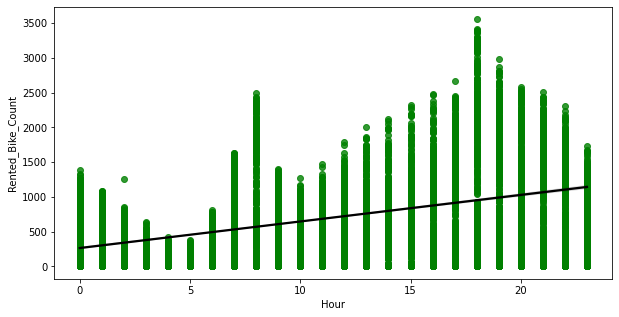

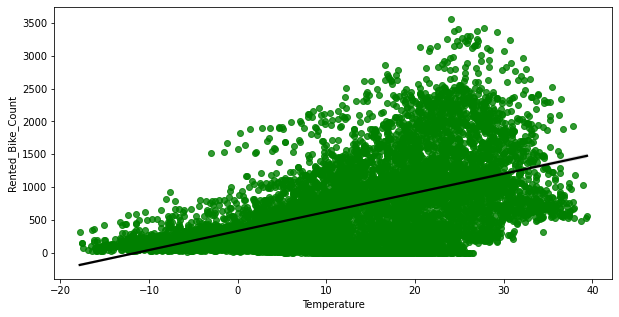

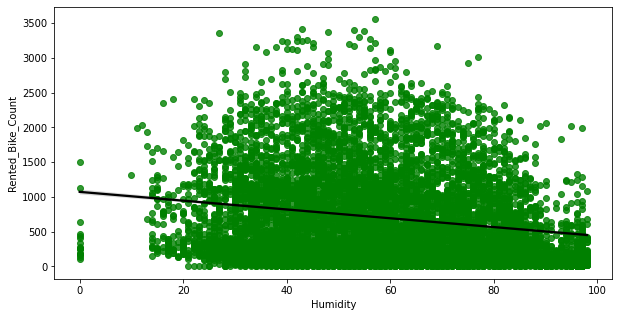

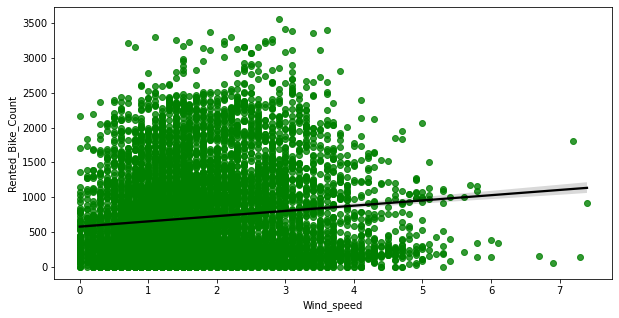

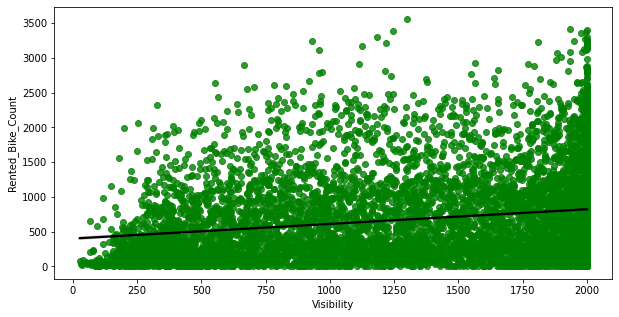

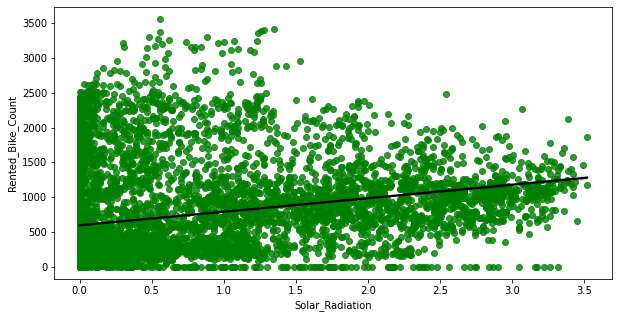

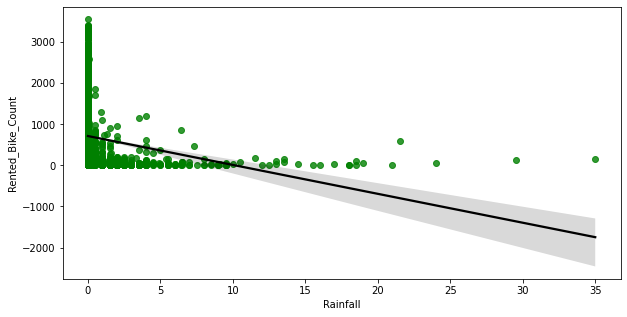

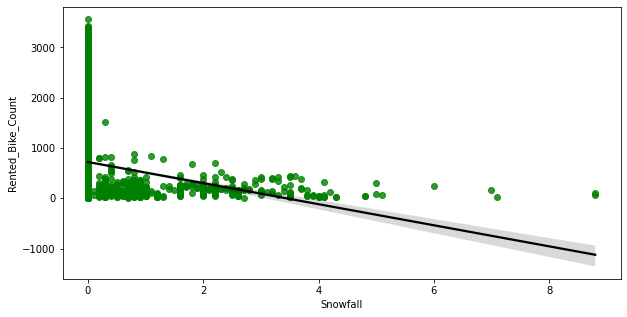

In [131]:
for col in numeric_col:
  plt.figure(figsize=(10,5))
  ax=fig.gca()
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

Dummy Encoding



In [132]:
# create copy of dataset

copy_df=df.copy()

In [133]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
copy_df.drop('Dew_point_temperature',inplace=True,axis=1)

In [134]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [135]:
Calculate_vif(copy_df[[i for i in copy_df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.961874
1,Temperature,3.236809
2,Humidity,6.114153
3,Wind_speed,4.616621
4,Visibility,5.404128
5,Solar_Radiation,2.272068
6,Rainfall,1.081252
7,Snowfall,1.125304
8,Month,4.580307
9,Weekdays_or_weekend,1.399708


In [136]:
Calculate_vif(copy_df[[i for i in copy_df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

,variables,VIF
0,Hour,3.931193
1,Temperature,2.543847
2,Wind_speed,4.301342
3,Visibility,5.330632
4,Solar_Radiation,1.894468
5,Rainfall,1.045135
6,Snowfall,1.081123
7,Month,3.741610
8,Weekdays_or_weekend,1.375146


In [137]:
Calculate_vif(copy_df[[i for i in copy_df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Hour,3.755736
1,Temperature,2.492225
2,Wind_speed,3.748534
3,Solar_Radiation,1.893823
4,Rainfall,1.030569
5,Snowfall,1.077566
6,Month,3.049391
7,Weekdays_or_weekend,1.350943


In [138]:
# As per above vif calculation dropping humidity and visibility columns.
copy_df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [139]:
copy_df=pd.get_dummies(copy_df,columns=['Seasons'],prefix='Seasons',drop_first=True)
# Labeling for holiday=1 and no holiday=0
copy_df['Holiday']=copy_df['Holiday'].map({'No Holiday':0, 'Holiday':1})
# # Labeling for Yes=1 and no No=0
copy_df['Functioning_Day']=copy_df['Functioning_Day'].map({'Yes':1, 'No':0})

In [140]:
copy_df.head()

,Rented_Bike_Count,Hour,Temperature,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Weekdays_or_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,2.2,0.0,0.0,0.0,0,1,1,0,0,0,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,0,1,1,0,0,0,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,0,1,1,0,0,0,1
3,107,3,-6.2,0.9,0.0,0.0,0.0,0,1,1,0,0,0,1
4,78,4,-6.0,2.3,0.0,0.0,0.0,0,1,1,0,0,0,1


# **Linear Regression**

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [142]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=copy_df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(copy_df['Rented_Bike_Count'])

In [143]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [99]:
copy_df.drop('Date',inplace=True,axis=1)

In [145]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [146]:
# Cheeck coefficents
l_reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [147]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.034125
Temperature,24.395632
Wind_speed,3.358253
Solar_Radiation,3.435103
Rainfall,-71.139711
Snowfall,-10.476341
Holiday,-3.005512
Functioning_Day,28.479819
Month,1.055219
Weekdays_or_weekend,-0.589300


In [148]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [149]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.
